In [2]:
import matplotlib
matplotlib.rc("font", family="NanumBarunGothic")
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [4]:
from pathlib import Path
IMAGE_PATH = Path() / "images"/ "nlp"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import tensorflow as tf
if not tf.config.list_physical_devices("GPU"):
    print("not detect GPU")

2024-08-07 12:29:46.411034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 12:29:46.478530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 12:29:46.501162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 12:29:46.637081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 12:29:48.927924: W tensorflow/compiler/tf2

In [6]:
tf.random.set_seed(42)
encoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate= 0.5)

autoencoder.compile(loss="mse", optimizer=optimizer)

I0000 00:00:1723001391.494889   63790 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723001391.495050   63790 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723001391.495084   63790 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723001392.057052   63790 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723001392.057136   63790 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-07

In [7]:
import numpy as np
from scipy.spatial.transform import Rotation
m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) **3 + 0.5) *2 *np.pi
X[:, 0], X[:,1] = np.cos(angles), np.sign(angles) *0.5
X += 0.28 * np.random.randn(m, 3)
X = Rotation.from_rotvec([np.pi / 29 , -np.pi / 20, np.pi /4]).apply(X)
X_train = X + [0.2, 0, 0.2]

In [8]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=False)
codings = encoder.predict(X_train)

I0000 00:00:1723001393.097841   75175 service.cc:146] XLA service 0x7f3c2401aee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723001393.097884   75175 service.cc:154]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2024-08-07 12:29:53.182929: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1723001393.669640   75175 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarun

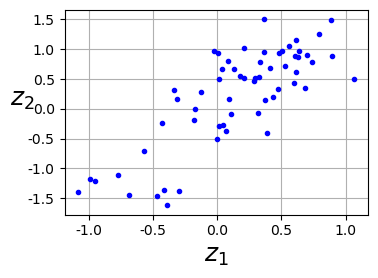

In [9]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18,rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32)/ 255
X_train , X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [11]:
tf.random.set_seed(42)

stacked_encoder=  tf.keras.Sequential([
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(30, activation="relu")
])
stacked_decoder=  tf.keras.Sequential([

     tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(28 *28),
      tf.keras.layers.Reshape([28,28])
])

stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20


2024-08-07 12:30:10.900357: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0344 - val_loss: 0.0185
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0177 - val_loss: 0.0168
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0164 - val_loss: 0.0160
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0152 - val_loss: 0.0153
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0144 - val_loss: 0.0147
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0143 - val_loss: 0.0146
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0141 - val_loss: 0.0145
Epoch 12/20
1719/1719 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


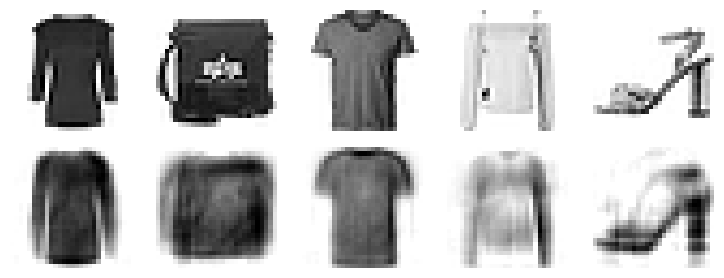

In [12]:
def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions =np.clip(model.predict(images[:n_images]), 0,1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1+ n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
save_fig("reconstruction_plot")
plt.show()

In [13]:
from sklearn.manifold import TSNE

X_valid_compressed= stacked_encoder.predict(X_valid)
tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)
    

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

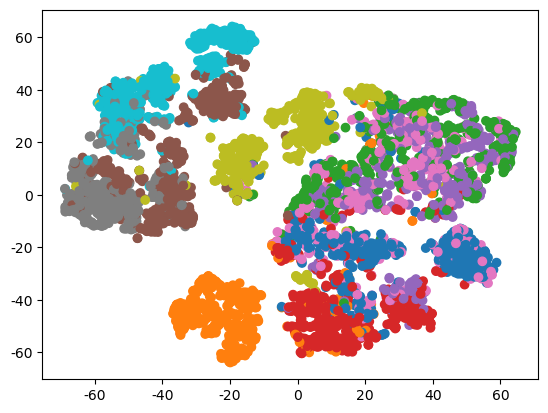

In [14]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:,1], c=y_valid, cmap="tab10")
plt.show()

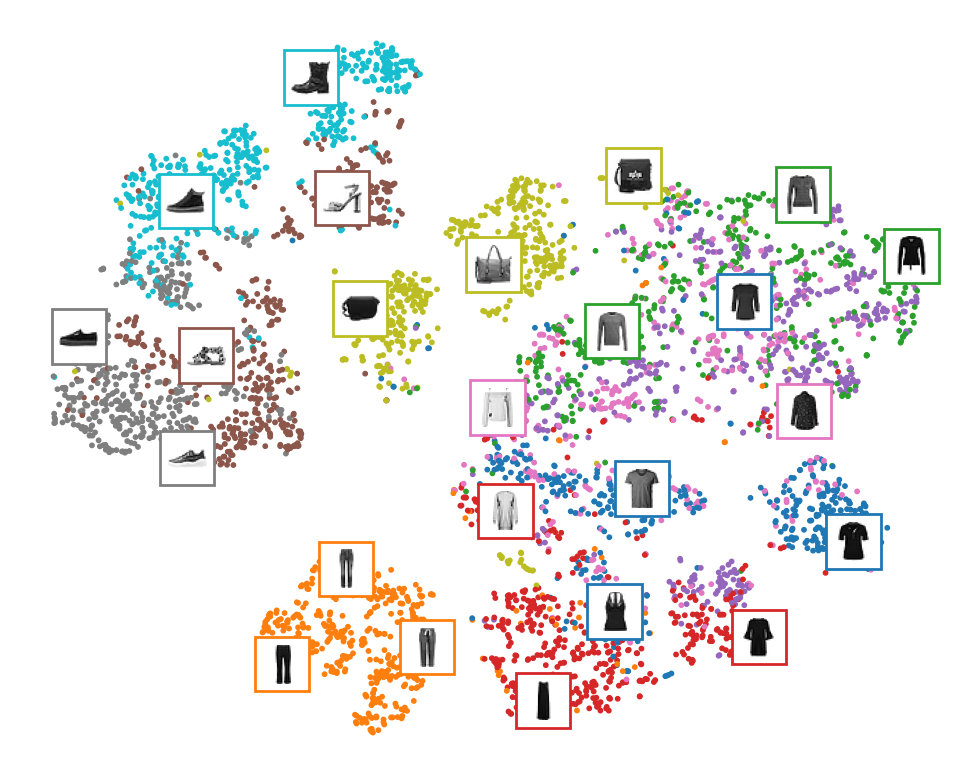

In [15]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z- Z.min()) / (Z.max() - Z.min())
plt.scatter(Z[:, 0], Z[:,1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) **2 ).sum(axis=1)
    if dist.min() > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, 
         bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        
        plt.gca().add_artist(imagebox)

plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

In [16]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=(self.dense.kernel.shape[0],),
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)

In [17]:
tf.random.set_seed(42)

dense_1 = tf.keras.layers.Dense(100, activation="relu")
dense_2 = tf.keras.layers.Dense(30, activation="relu")

tied_encoder= tf.keras.Sequential([tf.keras.layers.Flatten(), dense_1, dense_2])

tied_decoder= tf.keras.Sequential([DenseTranspose(dense_2, activation="relu"),
                                   DenseTranspose(dense_1), 
                                   tf.keras.layers.Reshape([28,28])])


In [18]:
tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

In [19]:
tied_ae.compile(loss="mse", optimizer="nadam")
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0344 - val_loss: 0.0172
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0147 - val_loss: 0.0146
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0141 - val_loss: 0.0141
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0135 - val_loss: 0.0137


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


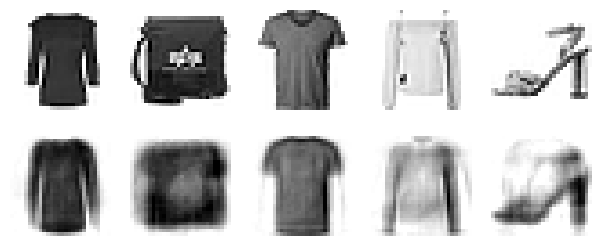

In [20]:
plot_reconstructions(tied_ae)
plt.show()

In [21]:
def train_autoencoder(n_neurons,  X_train, X_valid, n_epochs=10,
                      output_activation=None):
    n_inputs = X_train.shape[-1]
    encoder =tf.keras.layers.Dense(n_neurons, activation="relu")
    decoder = tf.keras.layers.Dense(n_inputs, activation=output_activation )
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(loss="mse", optimizer="nadam")
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)


In [23]:
tf.random.set_seed(42)

X_train_flat= tf.keras.layers.Flatten()(X_train)
X_valid_flat=  tf.keras.layers.Flatten()(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(100, X_train_flat, X_valid_flat)
enc2, dec2, _, _ = train_autoencoder(30, X_train_enc1, X_valid_enc1, output_activation="relu")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0312 - val_loss: 0.0116
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1349 - val_loss: 0.0516
Epoch 2/10
1719/1719 ━━━━━━━━━━

In [24]:
stacked_ae_1_by_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    enc1, enc2, dec2, dec1,
    tf.keras.layers.Reshape([28,28])
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


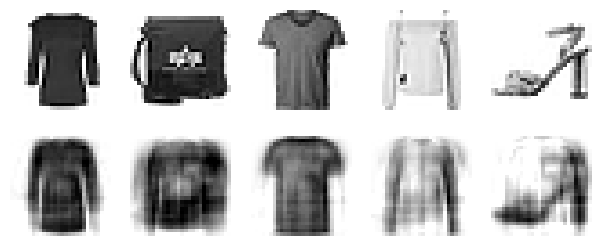

In [25]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

In [26]:
stacked_ae_1_by_1.compile(loss="mse", optimizer="nadam")
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=5,
                                validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0168 - val_loss: 0.0153
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0132 - val_loss: 0.0132


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


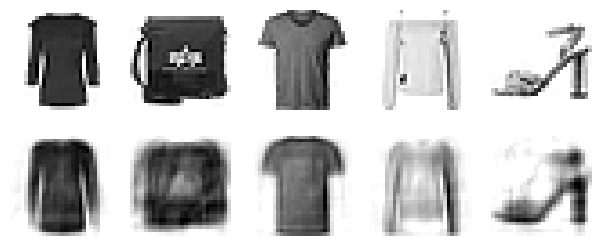

In [27]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

In [29]:
tf.random.set_seed(42)

In [32]:
conv_encoder =tf.keras.Sequential([
    tf.keras.layers.Reshape([28,28,1]),
     tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2), 
      tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2),
       tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
      tf.keras.layers.GlobalAvgPool2D(),
])

conv_decoder=tf.keras.Sequential([
    tf.keras.layers.Dense(3*3 * 16),
     tf.keras.layers.Reshape((3,3,16)),
     tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
        tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu", padding="same"),
           tf.keras.layers.Conv2DTranspose(1, 3, strides=2,  padding="same"),
            tf.keras.layers.Reshape([28,28]),
])
conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="mse", optimizer="nadam")
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data = (X_valid, X_valid))



Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.0424 - val_loss: 0.0209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0197 - val_loss: 0.0183
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0159 - val_loss: 0.0155
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0133 - val_loss: 0.0132
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0126 - val_loss: 0.0126


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step


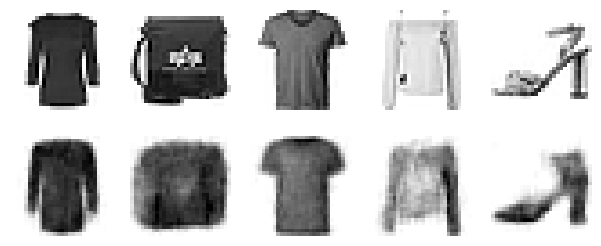

In [33]:

plot_reconstructions(conv_ae)
plt.show()

In [35]:
recurrent_encoder = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(30)
])
recurrent_decoder = tf.keras.Sequential([
    tf.keras.layers.RepeatVector(28),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dense(28)
])


In [37]:
recurrent_ae = tf.keras.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="mse", optimizer="nadam")

In [38]:
history = recurrent_ae.fit(X_train, X_train, epochs=10,
                      validation_data = (X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - loss: 0.0358 - val_loss: 0.0194
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - loss: 0.0185 - val_loss: 0.0164
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - loss: 0.0125 - val_loss: 0.0120
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - loss: 0.0108 - val_loss: 0.0105


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


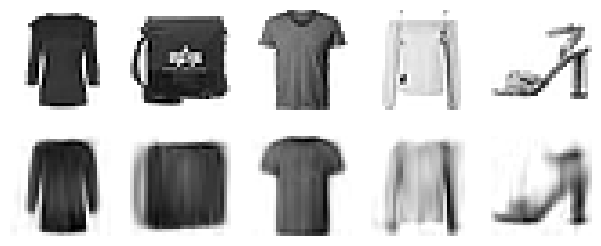

In [39]:
plot_reconstructions(recurrent_ae)
plt.show()

In [40]:
dropout_encoder = tf.keras.Sequential([
     tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
dropout_decoder = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
      tf.keras.layers.Reshape([28, 28])
])
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="mse", optimizer="nadam")
history = dropout_ae.fit(X_train, X_train, epochs=10,
                      validation_data = (X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0395 - val_loss: 0.0209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0220 - val_loss: 0.0192
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0207 - val_loss: 0.0183
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0199 - val_loss: 0.0177
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0194 - val_loss: 0.0175
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0190 - val_loss: 0.0171
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0187 - val_loss: 0.0170
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0186 - val_loss: 0.0167
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0184 - val_loss: 0.0167
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0183 - val_loss: 0.0166


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


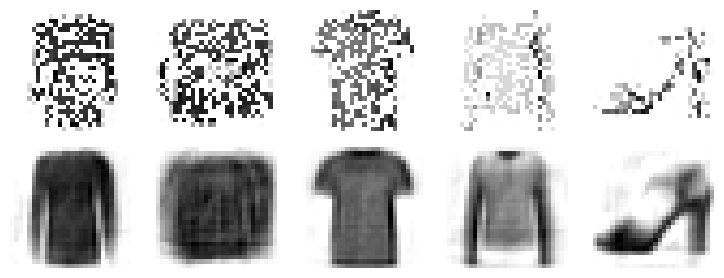

In [41]:
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot")
plt.show()

In [42]:
sparse_l1_encoder = tf.keras.Sequential([
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])
sparse_l1_decoder = tf.keras.Sequential([
   tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
      tf.keras.layers.Reshape([28, 28])
])
sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="mse", optimizer="nadam")
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                      validation_data = (X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0813 - val_loss: 0.0320
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0298 - val_loss: 0.0274
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0265 - val_loss: 0.0251
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0244 - val_loss: 0.0235
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0230 - val_loss: 0.0224
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0220 - val_loss: 0.0216
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0205 - val_loss: 0.0205
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0200 - val_loss: 0.0204
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0196 - val_loss: 0.0202


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


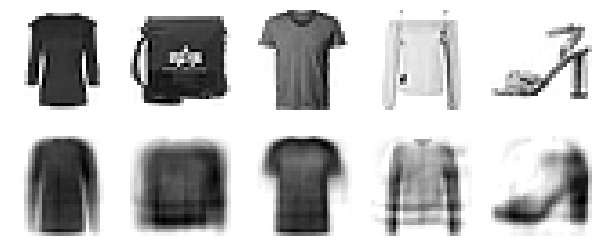

In [43]:
plot_reconstructions(sparse_l1_ae)
plt.show()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarun

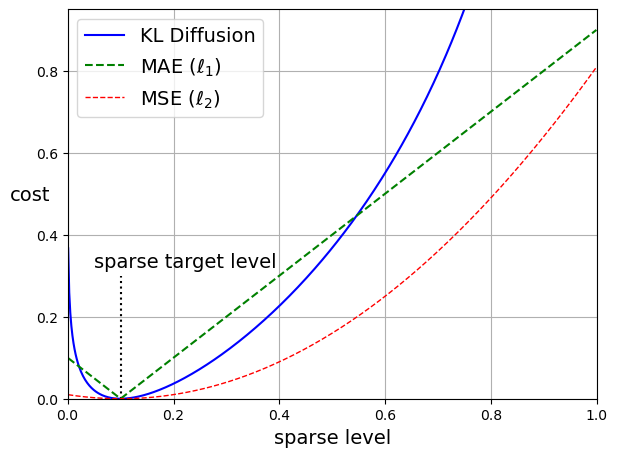

In [44]:
p = 0.1
q =np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p/q) + (1-p) * np.log((1-p) / (1-q))
mse = (p-q)**2
mae = np.abs(p-q)
plt.plot([p,p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "sparse target level", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL Diffusion")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q,  mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("sparse level")
plt.ylabel("cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
plt.grid(True)
save_fig("sparsity_loss_plot")

In [49]:
# kl_divergence = tf.keras.losses.kullback_leibler_divergence

# class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
#     def __init__(self, weight, target):
#         self.weight =weight
#         self.target = target

#     def __cal__(self, inputs):
#         mean_activities = tf.reduce_mean(inputs, axis=0)
#         return self.weight * (
#             kl_divergence(self.target, mean_activities) + 
#             kl_divergence(1. - self.target, 1. - mean_activities)
#         )
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight, target):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = tf.reduce_mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [50]:

kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)
sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid",
                          activity_regularizer=kld_reg)
])
sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
sparse_kl_ae.compile(loss="mse", optimizer="nadam")
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0709 - val_loss: 0.0231
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0205 - val_loss: 0.0190
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0142 - val_loss: 0.0144
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0102 - val_loss: 0.0103


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


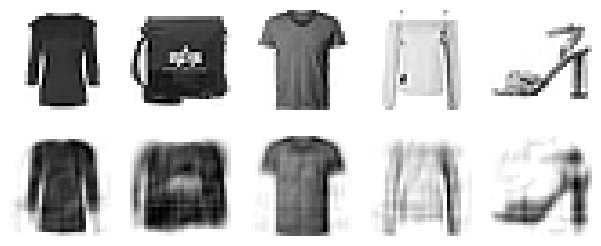

In [51]:
plot_reconstructions(sparse_kl_ae)
plt.show()

In [83]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [84]:
codings_size = 10

In [85]:
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [86]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [87]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [88]:
# latent_loss = -0.5 * tf.reduce_sum(
#     1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
#     axis=-1)
# variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [90]:
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [91]:
variational_ae.compile(loss="mse", optimizer="nadam")
history = variational_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0350 - val_loss: 0.0188
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0180 - val_loss: 0.0171
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0156 - val_loss: 0.0155
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0150 - val_loss: 0.0152
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0147 - val_loss: 0.0150
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0146 - val_loss: 0.0150


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


TypeError: Invalid shape (5, 28, 28) for image data

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

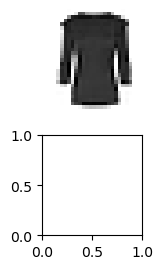

In [92]:
plot_reconstructions(variational_ae)
plt.show()

In [93]:
codings = tf.random.normal(shape=[3 *7 , codings_size])
images = variational_decoder(codings).numpy()

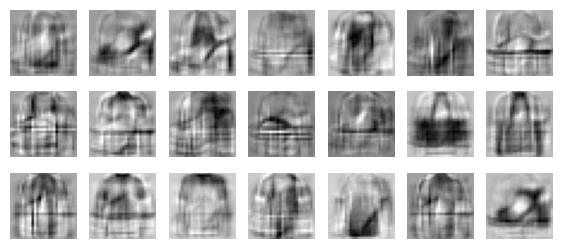

In [94]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) -1 )// n_cols +1
    if images.shape[-1] ==1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plot_multiple_images(images, 7)
save_fig("vae_generated_images_plot", tight_layout=False)
plt.show()

In [96]:

codings = np.zeros([7 , codings_size])
codings[:, 3] = np.linspace(-0.8 ,0.8, 7)
images = variational_decoder(codings).numpy()

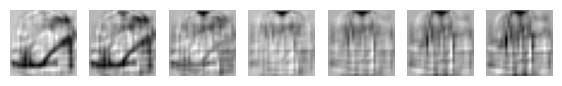

In [97]:

plot_multiple_images(images)
save_fig("semantic_interplation_plot", tight_layout=False)
plt.show()

In [98]:

coding_size = 30
Dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([

    Dense(100, activation="relu",
                         kernel_initializer="he_normal"),

   Dense(150, activation="relu",
                         kernel_initializer="he_normal"),
    Dense(28*28, activation="sigmoid"),
                         tf.keras.layers.Reshape([28, 28]),


])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
 
   Dense(150, activation="relu",
                         kernel_initializer="he_normal"),
                         Dense(28*28, activation="sigmoid"),
                         

  Dense(100, activation="relu",
                         kernel_initializer="he_normal"),

  Dense(1, activation="sigmoid")
])
gan = tf.keras.Sequential([generator, discriminator])

# 추가 코드 - 모델을 컴파일하고 훈련합니다.
discriminator.compile(loss="binary_crossentopy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentopy", optimizer="rmsprop")

In [99]:
batch_size =32
dataset= tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch()

TypeError: DatasetV2.prefetch() missing 1 required positional argument: 'buffer_size'